In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import copy


In [2]:
df=pd.read_csv('./CBC data_for_meandeley_csv.csv')
df.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB
0,1.0,28.0,0.0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
1,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
2,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
3,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
4,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S. No.  364 non-null    float64
 1   Age     364 non-null    float64
 2   Sex     364 non-null    float64
 3   RBC     364 non-null    float64
 4   PCV     364 non-null    float64
 5   MCV     364 non-null    float64
 6   MCH     364 non-null    float64
 7   MCHC    364 non-null    float64
 8   RDW     364 non-null    float64
 9   TLC     364 non-null    float64
 10  PLT     364 non-null    float64
 11  HGB     364 non-null    float64
dtypes: float64(12)
memory usage: 35.1 KB


In [4]:
df.columns

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT', 'HGB'],
      dtype='object')

In [5]:
df.drop('S. No.', axis=1, inplace=True)
df.dropna(inplace=True)

In [6]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Age', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW','TLC', 'PLT', 'HGB']])
df_scaled

array([[0.21794872, 0.77617329, 0.47716895, ..., 0.22513607, 0.182     ,
        0.35064935],
       [0.38461538, 0.61732852, 0.71689498, ..., 0.12419594, 0.62923077,
        0.62337662],
       [0.37179487, 0.59386282, 0.65068493, ..., 0.15066799, 0.48461538,
        0.5974026 ],
       ...,
       [0.12820513, 0.56137184, 0.60730594, ..., 0.17812964, 0.49076923,
        0.57792208],
       [0.30769231, 0.61191336, 0.52739726, ..., 0.11083622, 0.25230769,
        0.58441558],
       [0.19230769, 0.64801444, 0.71461187, ..., 0.16823355, 0.41384615,
        0.71428571]])

In [7]:
df[['Age', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW','TLC', 'PLT', 'HGB']] = df_scaled
df

,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB
0,0.217949,0.0,0.776173,0.477169,0.064327,0.086142,0.172932,0.505376,0.225136,0.182000,0.350649
1,0.384615,0.0,0.617329,0.716895,0.546784,0.531835,0.278195,0.129032,0.124196,0.629231,0.623377
2,0.371795,1.0,0.593863,0.650685,0.494152,0.528090,0.323308,0.129032,0.150668,0.484615,0.597403
3,0.833333,0.0,0.519856,0.538813,0.451754,0.449438,0.270677,0.231183,0.282286,0.390769,0.461039
4,0.115385,1.0,0.501805,0.543379,0.488304,0.490637,0.285714,0.139785,0.068036,0.286154,0.474026
...,...,...,...,...,...,...,...,...,...,...,...
359,0.076923,0.0,0.631769,0.595890,0.365497,0.486891,0.406015,0.150538,0.059377,0.261538,0.603896
360,0.512821,0.0,0.629964,0.504566,0.526316,0.610487,0.383459,0.145161,0.089065,0.315385,0.701299
361,0.128205,1.0,0.561372,0.607306,0.482456,0.546816,0.353383,0.155914,0.178130,0.490769,0.577922
362,0.307692,1.0,0.611913,0.527397,0.453216,0.494382,0.319549,0.155914,0.110836,0.252308,0.584416


In [8]:
df_kmean = copy.deepcopy(df)
df_knn = copy.deepcopy(df)
df_dbscan = copy.deepcopy(df)
df_mix = copy.deepcopy(df)

df.isnull().sum()

Age     0
Sex     0
RBC     0
PCV     0
MCV     0
MCH     0
MCHC    0
RDW     0
TLC     0
PLT     0
HGB     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 363
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     364 non-null    float64
 1   Sex     364 non-null    float64
 2   RBC     364 non-null    float64
 3   PCV     364 non-null    float64
 4   MCV     364 non-null    float64
 5   MCH     364 non-null    float64
 6   MCHC    364 non-null    float64
 7   RDW     364 non-null    float64
 8   TLC     364 non-null    float64
 9   PLT     364 non-null    float64
 10  HGB     364 non-null    float64
dtypes: float64(11)
memory usage: 34.1 KB


<Axes: xlabel='RBC', ylabel='TLC'>

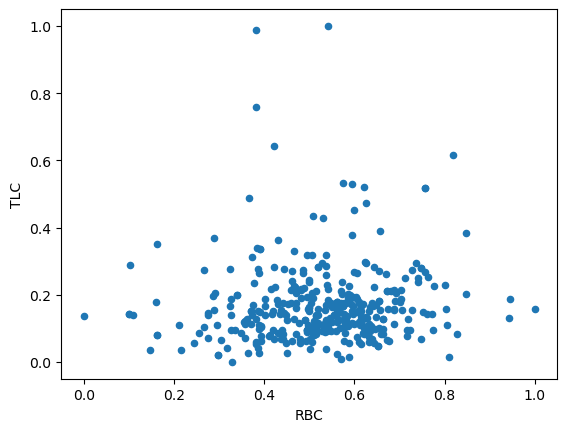

In [10]:
df.plot.scatter('RBC','TLC')

In [29]:
x = df['Sex'].value_counts()
x_values = [i for i in x]
print(x_values)
print(x)

[203, 161]
0.0    203
1.0    161
Name: Sex, dtype: int64


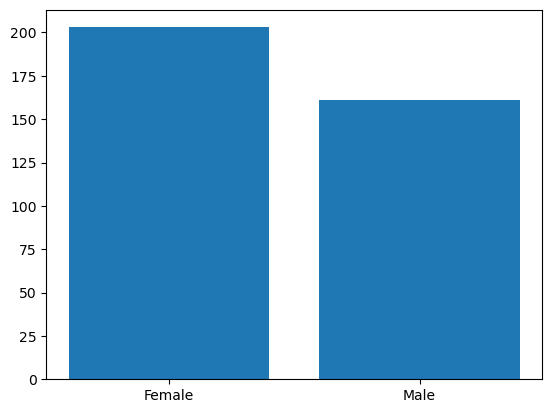

In [27]:
sex = ['Female', 'Male']
plt.bar(sex, x_values)

plt.show()

Age: 환자 나이

Sex: 성별

RBC: 적혈구의 수(3.5-5.0)

PCV: 헤마토크릿(적혈구 용적율);35-50%

MCV: 적혈구 평균 용적율;70-100

MCH: 적혈구 한 개당 혈색소량: 27-31

MCHC: 적혈구 한 개당 평균 혈색소 농도;33-37%

RDW: 적혈구 크기의 다양성을 나타내는 지표;9-16

TLC: 총 림프구의 수(4.5-11.0)

PLT: 혈소판의 수(150-440)

HGB:헤모글로빈(12-16g/dl)

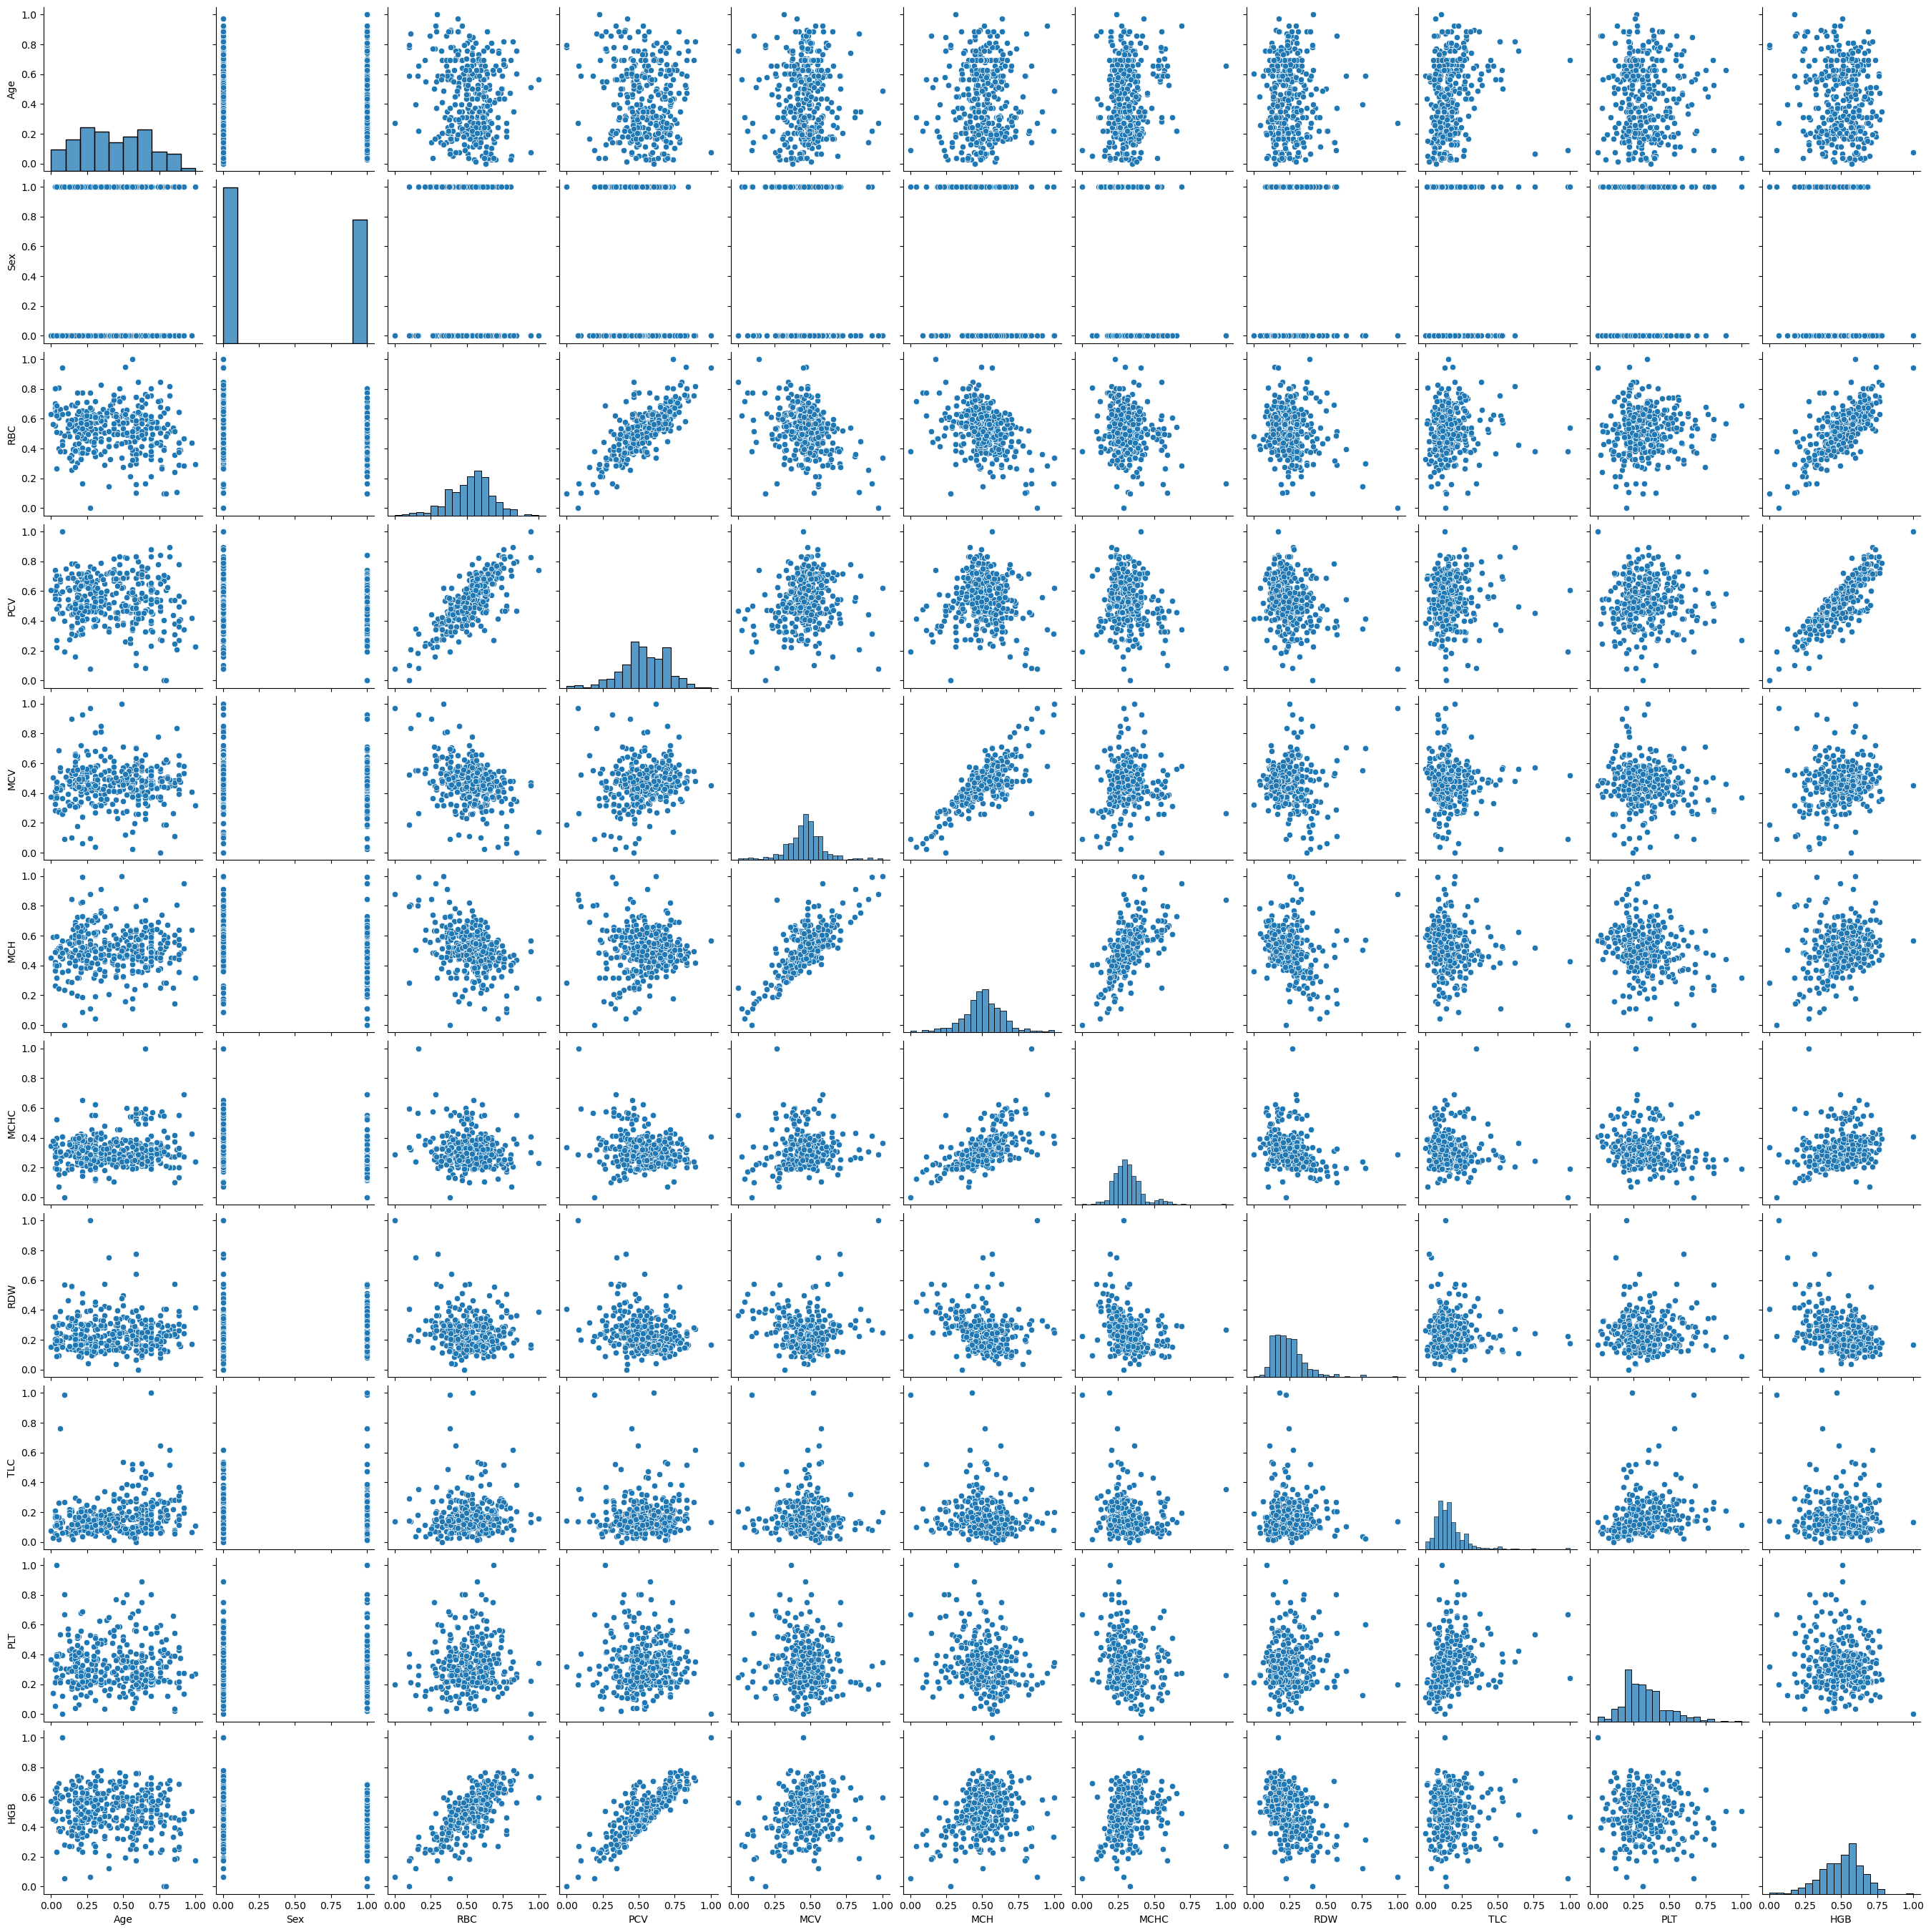

In [11]:
sns.pairplot(df, diag_kind='hist')
plt.show()

<Axes: >

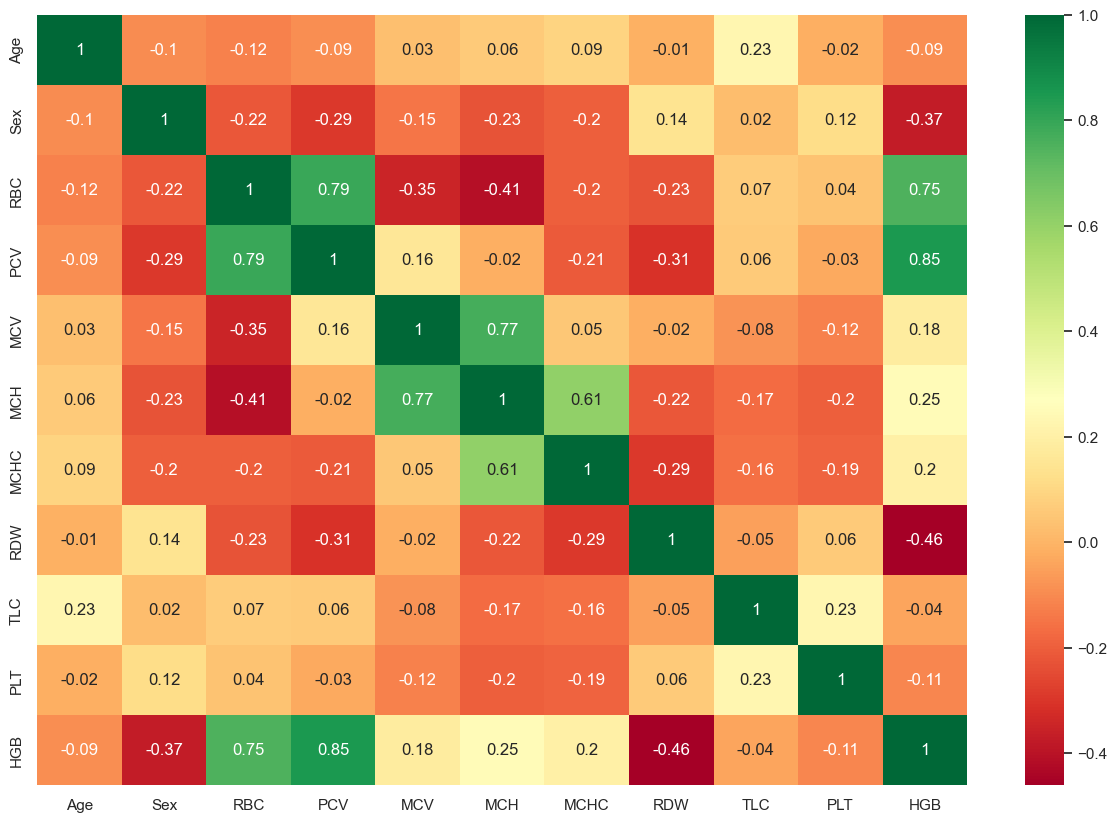

In [12]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr().round(2),cmap='RdYlGn',annot=True)

**Kmeans**

In [13]:
kmeans=KMeans(n_clusters=2, init='k-means++',max_iter=300,verbose=0, random_state=500)
kmeans.fit(df_kmean)
cluster=kmeans.labels_
print(cluster)

[0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1
 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0]


c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(df_kmean)
df_kmean['pca1']=pca_transformed[:,0]
df_kmean['pca2']=pca_transformed[:,1]
print(pca.explained_variance_ratio_)

[0.54472494 0.13657196]


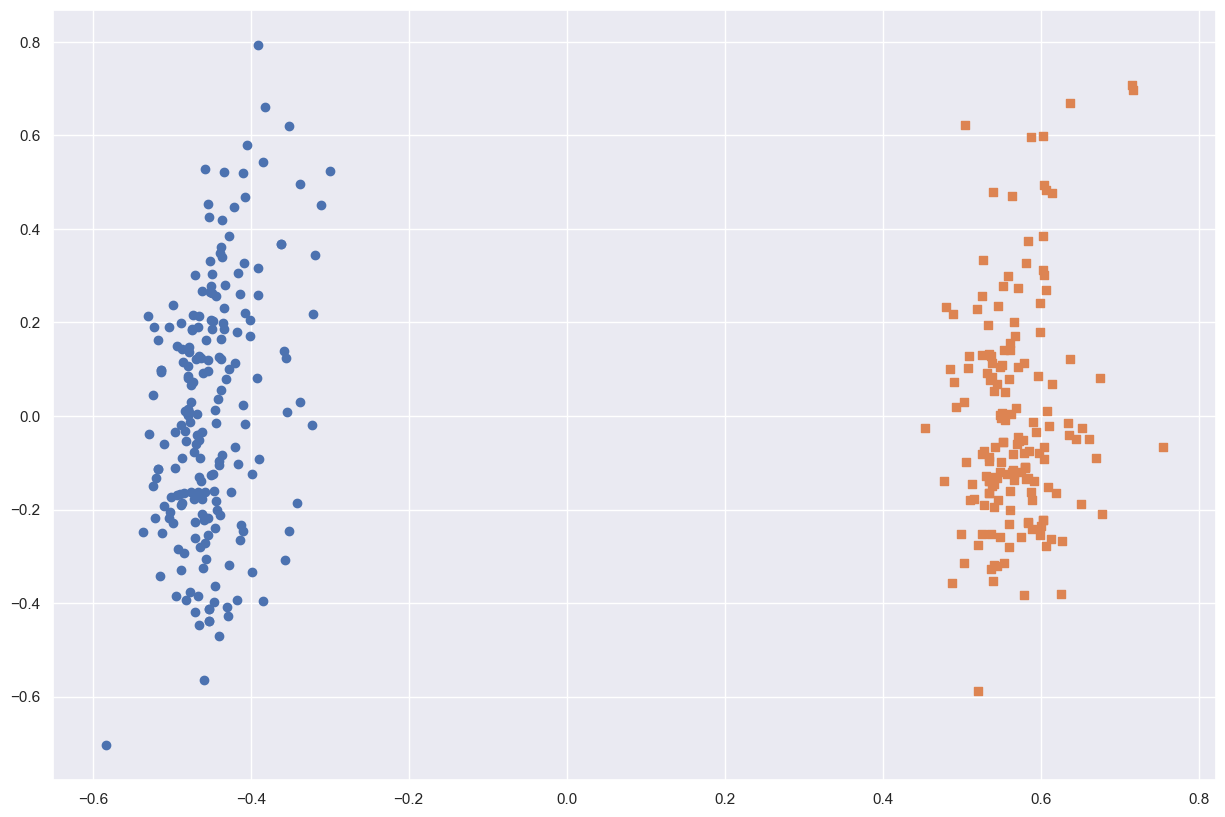

In [15]:
df_kmean['cluster_KMeans']=cluster
marker0_index=df_kmean[df_kmean['cluster_KMeans']==0].index
marker1_index=df_kmean[df_kmean['cluster_KMeans']==1].index

plt.scatter(x=df_kmean.loc[marker0_index,'pca1'], y=df_kmean.loc[marker0_index,'pca2'], marker='o')
plt.scatter(x=df_kmean.loc[marker1_index,'pca1'], y=df_kmean.loc[marker1_index,'pca2'], marker='s')

**Gaussian mixture**

In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

gm=GaussianMixture(n_components=2, n_init=10, random_state=200)
gm.fit(df_mix)
cluster2=gm.predict(df_mix)
print(cluster2)
accuracy=accuracy_score(cluster,cluster2)
print(accuracy)

[0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1
 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0]
1.0


c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [17]:
df_mix['cluster_Gaus']=cluster2
df_mix.head()

,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB,cluster_Gaus
0,0.217949,0.0,0.776173,0.477169,0.064327,0.086142,0.172932,0.505376,0.225136,0.182000,0.350649,0
1,0.384615,0.0,0.617329,0.716895,0.546784,0.531835,0.278195,0.129032,0.124196,0.629231,0.623377,0
2,0.371795,1.0,0.593863,0.650685,0.494152,0.528090,0.323308,0.129032,0.150668,0.484615,0.597403,1
3,0.833333,0.0,0.519856,0.538813,0.451754,0.449438,0.270677,0.231183,0.282286,0.390769,0.461039,0
4,0.115385,1.0,0.501805,0.543379,0.488304,0.490637,0.285714,0.139785,0.068036,0.286154,0.474026,1


In [18]:
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(df_mix)
df_mix['pca1']=pca_transformed[:,0]
df_mix['pca2']=pca_transformed[:,1]
print(pca.explained_variance_ratio_)
df_mix.head()

[0.69947296 0.08984093]


,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB,cluster_Gaus,pca1,pca2
0,0.217949,0.0,0.776173,0.477169,0.064327,0.086142,0.172932,0.505376,0.225136,0.182000,0.350649,0,-0.566079,-0.241833
1,0.384615,0.0,0.617329,0.716895,0.546784,0.531835,0.278195,0.129032,0.124196,0.629231,0.623377,0,-0.641575,-0.166491
2,0.371795,1.0,0.593863,0.650685,0.494152,0.528090,0.323308,0.129032,0.150668,0.484615,0.597403,1,0.762442,-0.176633
3,0.833333,0.0,0.519856,0.538813,0.451754,0.449438,0.270677,0.231183,0.282286,0.390769,0.461039,0,-0.622587,0.336561
4,0.115385,1.0,0.501805,0.543379,0.488304,0.490637,0.285714,0.139785,0.068036,0.286154,0.474026,1,0.791517,-0.274434


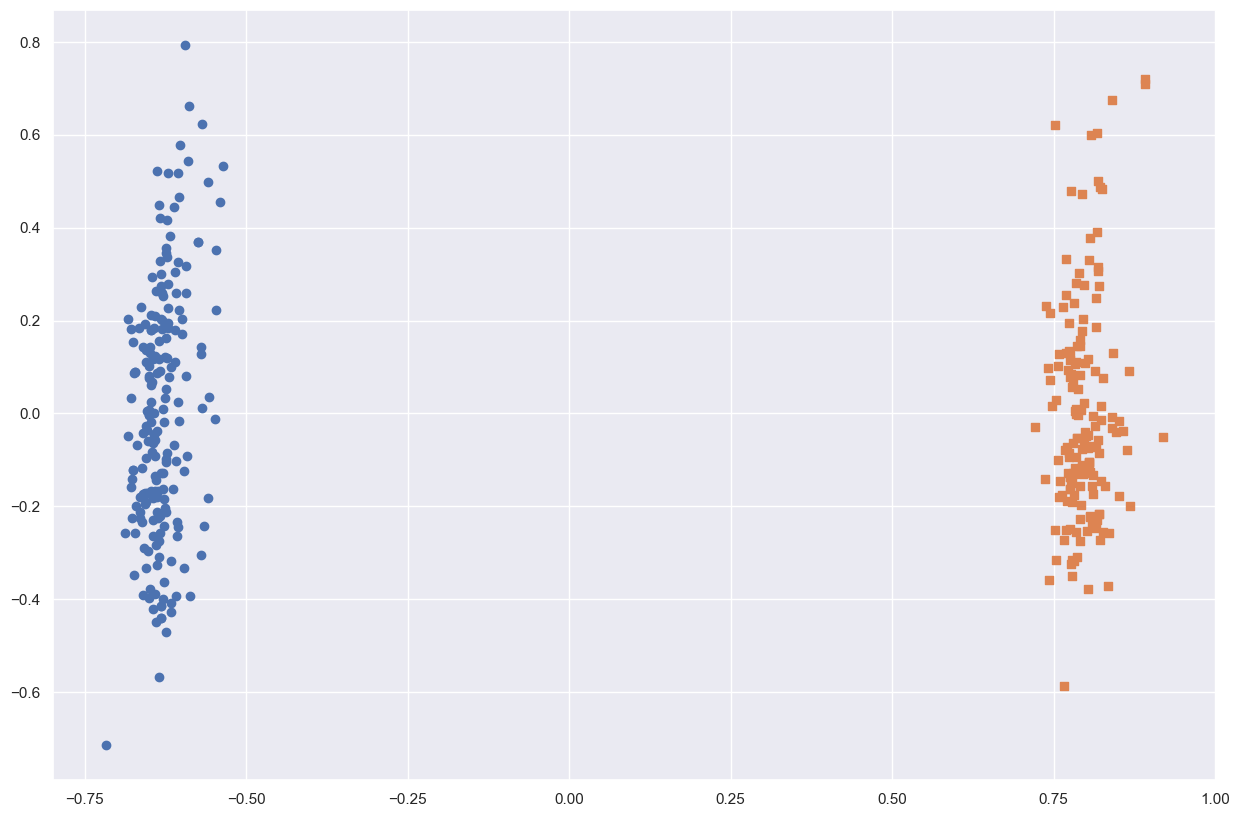

In [19]:
df_mix['cluster_Gaus']=cluster2
marker2_index=df_mix[df_mix['cluster_Gaus']==0].index
marker3_index=df_mix[df_mix['cluster_Gaus']==1].index

plt.scatter(x=df_mix.loc[marker2_index,'pca1'], y=df_mix.loc[marker2_index,'pca2'], marker='o')
plt.scatter(x=df_mix.loc[marker3_index,'pca1'], y=df_mix.loc[marker3_index,'pca2'], marker='s')

# **DBSCAN**

In [22]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1, min_samples=5)
predict=dbscan.fit_predict(df_dbscan)
print(predict)

[0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1
 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0]


In [23]:
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(df_dbscan)
df_dbscan['pca1']=pca_transformed[:,0]
df_dbscan['pca2']=pca_transformed[:,1]
print(pca.explained_variance_ratio_)
df_mix.head()

[0.64798185 0.16246025]


,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB,cluster_Gaus,pca1,pca2
0,0.217949,0.0,0.776173,0.477169,0.064327,0.086142,0.172932,0.505376,0.225136,0.182000,0.350649,0,-0.566079,-0.241833
1,0.384615,0.0,0.617329,0.716895,0.546784,0.531835,0.278195,0.129032,0.124196,0.629231,0.623377,0,-0.641575,-0.166491
2,0.371795,1.0,0.593863,0.650685,0.494152,0.528090,0.323308,0.129032,0.150668,0.484615,0.597403,1,0.762442,-0.176633
3,0.833333,0.0,0.519856,0.538813,0.451754,0.449438,0.270677,0.231183,0.282286,0.390769,0.461039,0,-0.622587,0.336561
4,0.115385,1.0,0.501805,0.543379,0.488304,0.490637,0.285714,0.139785,0.068036,0.286154,0.474026,1,0.791517,-0.274434


In [24]:
df_dbscan['cluster_db']=predict

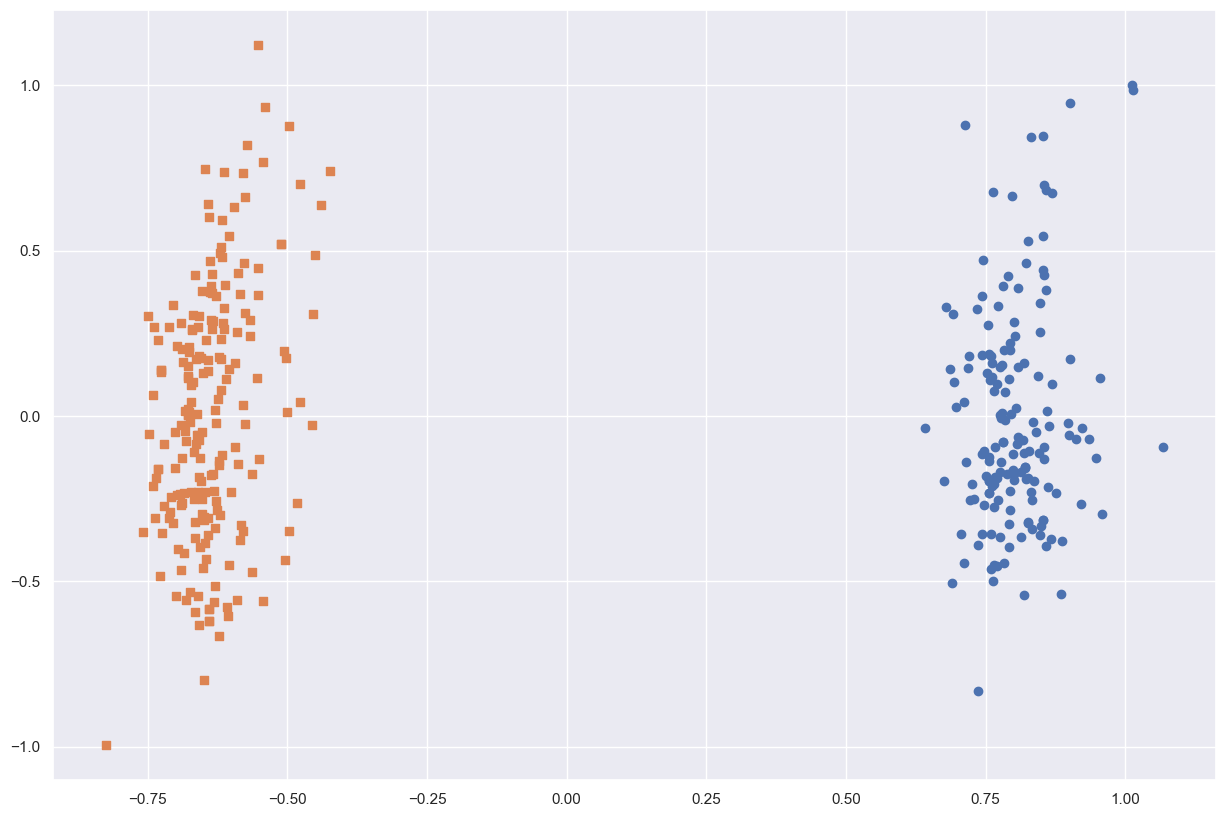

In [25]:
marker4_index=df_dbscan[df_dbscan['cluster_db']==1].index
marker5_index=df_dbscan[df_dbscan['cluster_db']==0].index
# marker6_index=df_dbscan[df_dbscan['cluster_db']==2].index

plt.scatter(x=df_dbscan.loc[marker4_index,'pca1'], y=df_dbscan.loc[marker4_index,'pca2'], marker='o')
plt.scatter(x=df_dbscan.loc[marker5_index,'pca1'], y=df_dbscan.loc[marker5_index,'pca2'], marker='s')
# plt.scatter(x=df_dbscan.loc[marker6_index,'pca1'], y=df_dbscan.loc[marker6_index,'pca2'], marker='^')

Silhouette Score

In [26]:
# 모든 개별 데이터에 실루엣 계수값을 구함. 
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(df_kmean, df_kmean['cluster_KMeans'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# 실루엣 계수 컬럼 추가
df_kmean['kmeans_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(df_kmean, df_kmean['cluster_KMeans'])
print('CBC dataset Silhouette Analysis Score:{0:.3f}'.format(average_score))

df_kmean.head(3)

silhouette_samples( ) return 값의 shape (364,)
CBC dataset Silhouette Analysis Score:0.633


,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB,pca1,pca2,cluster_KMeans,kmeans_coeff
0,0.217949,0.0,0.776173,0.477169,0.064327,0.086142,0.172932,0.505376,0.225136,0.182000,0.350649,-0.351385,-0.245663,0,0.482401
1,0.384615,0.0,0.617329,0.716895,0.546784,0.531835,0.278195,0.129032,0.124196,0.629231,0.623377,-0.466923,-0.162258,0,0.655352
2,0.371795,1.0,0.593863,0.650685,0.494152,0.528090,0.323308,0.129032,0.150668,0.484615,0.597403,0.515595,-0.177122,1,0.679822


In [27]:
df_kmean.groupby('cluster_KMeans')['kmeans_coeff'].mean()

cluster_KMeans
0    0.625246
1    0.647506
Name: kmeans_coeff, dtype: float64

In [28]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(model, cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.mixture import GaussianMixture
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    import warnings
    warnings.filterwarnings('ignore')
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        if model == 'kmeans':
            clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=200)
            cluster_labels = clusterer.fit_predict(X_features)
        elif model == 'gaussian':
            clusterer = GaussianMixture(n_components = n_cluster, n_init=500, random_state=200)
            cluster_labels = clusterer.fit_predict(X_features)
        elif model == 'dbscan':
            clusterer = DBSCAN(eps=float(n_cluster), min_samples = 5)
            cluster_labels = clusterer.fit_predict(X_features)
            n_cluster = len(set(cluster_labels))
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

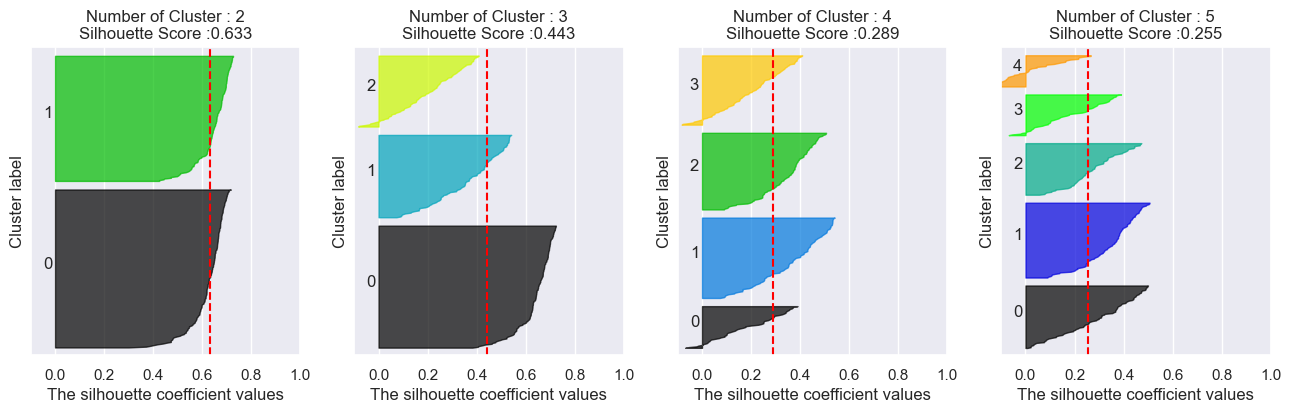

In [29]:
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette('kmeans',[ 2, 3, 4, 5], df_kmean)

In [30]:
# 모든 개별 데이터에 실루엣 계수값을 구함. 
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(df_mix, df_mix['cluster_Gaus'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# 실루엣 계수 컬럼 추가
df_mix['gaus_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(df_mix, df_mix['cluster_Gaus'])
print('CBC dataset Silhouette Analysis Score:{0:.3f}'.format(average_score))

df_mix.head(3)

silhouette_samples( ) return 값의 shape (364,)
CBC dataset Silhouette Analysis Score:0.676


,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB,cluster_Gaus,pca1,pca2,gaus_coeff
0,0.217949,0.0,0.776173,0.477169,0.064327,0.086142,0.172932,0.505376,0.225136,0.182000,0.350649,0,-0.566079,-0.241833,0.543984
1,0.384615,0.0,0.617329,0.716895,0.546784,0.531835,0.278195,0.129032,0.124196,0.629231,0.623377,0,-0.641575,-0.166491,0.695827
2,0.371795,1.0,0.593863,0.650685,0.494152,0.528090,0.323308,0.129032,0.150668,0.484615,0.597403,1,0.762442,-0.176633,0.720379


In [31]:
df_mix.groupby('cluster_Gaus')['gaus_coeff'].mean()

cluster_Gaus
0    0.668853
1    0.688590
Name: gaus_coeff, dtype: float64

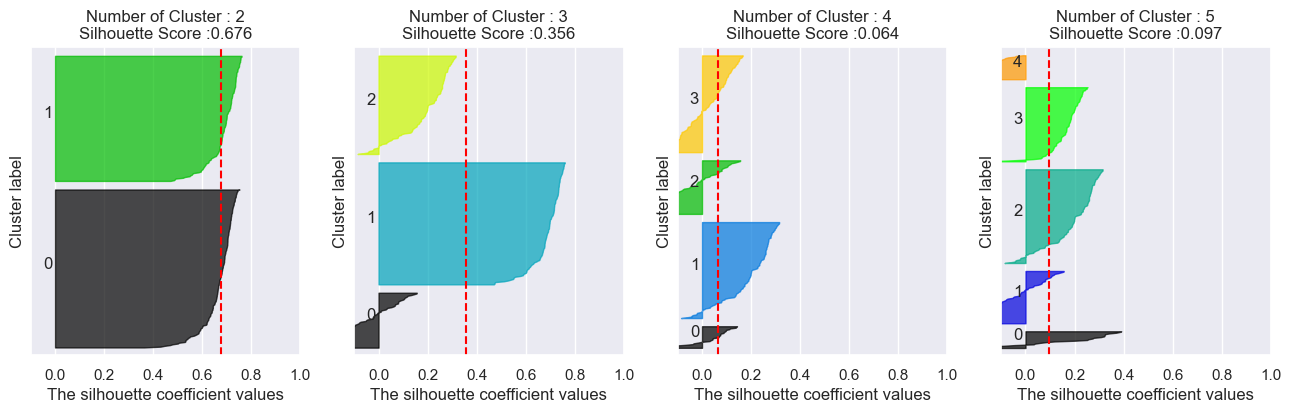

In [32]:
visualize_silhouette('gaussian', [2, 3, 4, 5], df_mix)

In [33]:
#모든 개별 데이터에 실루엣 계수값을 구함. 
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(df_dbscan, df_dbscan['cluster_db'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# 실루엣 계수 컬럼 추가
df_dbscan['db_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(df_dbscan, df_dbscan['cluster_db'])
print('CBC dataset Silhouette Analysis Score:{0:.3f}'.format(average_score))

df_dbscan.head(3)

silhouette_samples( ) return 값의 shape (364,)
CBC dataset Silhouette Analysis Score:0.649


,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB,pca1,pca2,cluster_db,db_coeff
0,0.217949,0.0,0.776173,0.477169,0.064327,0.086142,0.172932,0.505376,0.225136,0.182000,0.350649,-0.496933,-0.347420,0,0.510153
1,0.384615,0.0,0.617329,0.716895,0.546784,0.531835,0.278195,0.129032,0.124196,0.629231,0.623377,-0.660329,-0.229468,0,0.673502
2,0.371795,1.0,0.593863,0.650685,0.494152,0.528090,0.323308,0.129032,0.150668,0.484615,0.597403,0.729162,-0.250488,1,0.695797


In [34]:
df_dbscan.groupby('cluster_db')['db_coeff'].mean()

cluster_db
0    0.639146
1    0.665204
Name: db_coeff, dtype: float64

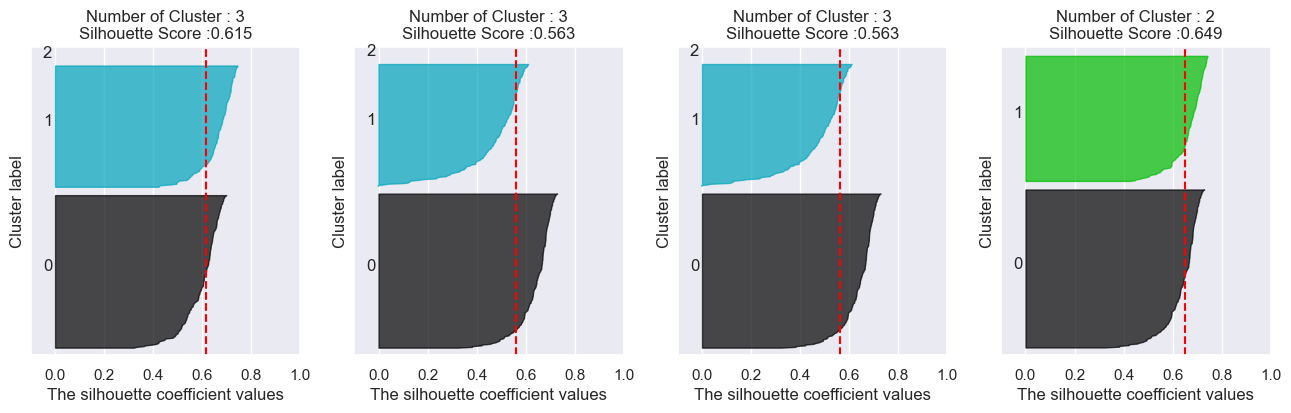

In [35]:
visualize_silhouette('dbscan',[0.7, 0.8, 0.9, 1.0], df_dbscan)